In [471]:
from bs4 import BeautifulSoup
from dateutil.parser import parse
from datetime import datetime
from datetime import datetime, timedelta
import urlparse
import pymongo 
from pymongo import MongoClient
import os

In [472]:
connection = MongoClient()
db = connection['espn_leagues_drafts']
auction_drafts = db['auction_drafts']
league_settings = db['league_settings']

In [5]:
print 'auction draft picks:',auction_drafts.count()
auction_drafts.find_one()

auction draft picks: 2370380


{u'_id': ObjectId('5696f378c807ee40f02d507e'),
 u'league_id': u'100005',
 u'nom_order': 16,
 u'player_id': u'4529',
 u'player_name': u'Yu Darvish',
 u'player_name_id': u'Yu Darvish (4529)',
 u'price': 1,
 u'season_id': u'2015',
 u'team_id': u'1',
 u'team_name': u'LEAGUE CHAMPION',
 u'unique_team_id': u'-2147483648'}

In [6]:
print 'auction drafts collected/stored:', len(auction_drafts.distinct("league_id"))

auction drafts collected/stored: 9359


In [7]:
league_settings.find_one()

{u'2015 Keeper Lock Date': u'Lock One Hour Before Draft',
 u'2015 Keepers Per Team': u'None',
 u'2016 Keeper Lock Date': u'Lock One Hour Before Draft',
 u'2016 Keepers Per Team': u'None',
 u'Allow Draft Pick Trading': u'Yes',
 u'Auction Budget': u'0',
 u'Current Roster Size': u' 20',
 u'Draft Date': u'Sunday, March 29, 2015 at 8:15 PM ET',
 u'Draft Order': u'Manually Set by League Manager',
 u'Draft Type': u'Snake',
 u'Format': u'League Manager',
 u'Keeper Note': u'',
 u'League Name': u"MLW (Malibu's Least Wanted)",
 u'Location': u'',
 u'Make League Viewable to Public': u'Yes',
 u'Note': u'',
 u'Number of Teams': u'12',
 u'Scoring Type': u'Head to Head Each Category',
 u'Seconds Per Pick': u'60',
 u'Total On Bench': u' 5 (2 DL)',
 u'Total Starters': u' 15',
 u'Use Keepers for 2015 Season': u'No',
 u'Use Keepers for 2016 Season': u'No',
 u'_id': ObjectId('5696ea45c807ee4d9977fd18'),
 u'league_id': u'10000',
 u'positions': {u'1B': u'1',
  u'2B': u'1',
  u'3B': u'1',
  u'BE': u'5',
  u'C'

In [100]:
league_settings.group(["Format"], {}, {"count":0},"function(o, p){p.count++}" )

[{u'Format': u'League Manager', u'count': 19409.0},
 {u'Format': u'Standard', u'count': 30421.0},
 {u'Format': u'ESPN Custom', u'count': 20320.0}]

In [101]:
league_settings.group(["Scoring Type"], {}, {"count":0},"function(o, p){p.count++}" )

[{u'Scoring Type': u'Head to Head Each Category', u'count': 23428.0},
 {u'Scoring Type': u'Rotisserie', u'count': 18799.0},
 {u'Scoring Type': u'Head to Head Points', u'count': 22658.0},
 {u'Scoring Type': u'Head to Head Most Categories', u'count': 3886.0},
 {u'Scoring Type': u'Total Season Points', u'count': 1379.0}]

In [102]:
league_settings.group(["Draft Type"], {}, {"count":0},"function(o, p){p.count++}" )

[{u'Draft Type': u'Snake', u'count': 54688.0},
 {u'Draft Type': u'Auction', u'count': 9359.0},
 {u'Draft Type': u'Autopick', u'count': 3666.0},
 {u'Draft Type': u'Offline', u'count': 2436.0},
 {u'Draft Type': None, u'count': 1.0}]

In [145]:
league_settings.group(["Number of Teams"], {}, {"count":0},"function(o, p){p.count++}" )

[{u'Number of Teams': u'12', u'count': 6715.0},
 {u'Number of Teams': u'10', u'count': 46598.0},
 {u'Number of Teams': u'8', u'count': 6926.0},
 {u'Number of Teams': u'14', u'count': 935.0},
 {u'Number of Teams': u'20', u'count': 694.0},
 {u'Number of Teams': u'6', u'count': 2941.0},
 {u'Number of Teams': u'16', u'count': 814.0},
 {u'Number of Teams': u'4', u'count': 3000.0},
 {u'Number of Teams': u'5', u'count': 359.0},
 {u'Number of Teams': u'9', u'count': 320.0},
 {u'Number of Teams': u'13', u'count': 95.0},
 {u'Number of Teams': u'15', u'count': 133.0},
 {u'Number of Teams': u'7', u'count': 258.0},
 {u'Number of Teams': u'11', u'count': 262.0},
 {u'Number of Teams': u'18', u'count': 87.0},
 {u'Number of Teams': u'17', u'count': 12.0},
 {u'Number of Teams': u'19', u'count': 1.0}]

In [104]:
league_settings.group(["Use Keepers for 2015 Season"], {}, {"count":0},"function(o, p){p.count++}" )

[{u'Use Keepers for 2015 Season': u'No', u'count': 62199.0},
 {u'Use Keepers for 2015 Season': u'Yes', u'count': 7950.0},
 {u'Use Keepers for 2015 Season': None, u'count': 1.0}]

In [424]:
auction_standard_10team_league_ids = list(league_settings.find({"Draft Type":"Auction","Number of Teams":"10",
                                                         "Format":"Standard",
               "Auction Budget":"260","Scoring Type":"Rotisserie",
               "Use Keepers for 2015 Season":"No"},{"_id":0,"league_id":1}))

auction_standard_10team_league_ids =[d['league_id'] for d in auction_standard_10team_league_ids]
print len(auction_standard_10team_league_ids)
#auction_standard_10team_league_ids

2478


In [473]:
# auction_drafts = db['auction_drafts']
# pipe = [{'$match':{'league_id':{'$in': auction_standard_10team_league_ids}}},
#         { '$out' : "standard_auction_10team_roto_picks" }]

# auction_drafts.aggregate(pipeline=pipe)
standard_auction_10team_roto_picks = db['standard_auction_10team_roto_picks']

In [474]:
len(standard_auction_10team_roto_picks.distinct('league_id'))

2478

In [475]:
snake_standard_10team_league_ids = list(league_settings.find({"Draft Type":"Snake","Number of Teams":"10",
                                                         "Format":"Standard","Scoring Type":"Rotisserie",
               "Use Keepers for 2015 Season":"No"},{"_id":0,"league_id":1}))

snake_standard_10team_league_ids =[d['league_id'] for d in snake_standard_10team_league_ids]
print len(snake_standard_10team_league_ids)
#auction_standard_10team_league_ids

8009


In [476]:
# snake_drafts = db['snake_drafts']
# pipe = [{'$match':{'league_id':{'$in': snake_standard_10team_league_ids}}},
#         { '$out' : "standard_snake_10team_roto_picks" }]

# snake_drafts.aggregate(pipeline=pipe)
standard_snake_10team_roto_picks = db['standard_snake_10team_roto_picks']

In [477]:
sta

8009

In [507]:
pipe = [{'$group':{'_id':'$player_name_id','total':{'$sum':1},'avg_price':{'$avg':'$price'}}},
        { '$sort' : { 'avg_price':-1} },
        { '$match': { 'total': { '$gte': 0 } } },
        { '$out' : "auction_standard_10team_avg_prices" }
        ]

standard_auction_10team_roto_picks.aggregate(pipeline=pipe)

auction_standard_10team_avg_prices = db['auction_standard_10team_avg_prices']
auction_standard_10team_avg_prices.count()

players_df = pd.DataFrame(list(auction_standard_10team_avg_prices.find()))

players_df.to_csv('players_with_names_ids.csv')

In [470]:
auction_standard_10team_avg_prices_df = pd.DataFrame(list(auction_standard_10team_avg_prices.find()))
auction_standard_10team_avg_prices_df.to_csv('average_auction_vals.csv')

In [148]:
#auction_standard_10team_avg_prices.find_one()

In [108]:
# for player in auction_standard_10team_avg_prices.find()[:500]:
#     print player

In [109]:
# pipe = [{'$match':{'player_id':'3280'}},
#         { '$out' : "mike_trout_standard_auction_10team_roto_picks" }]

# standard_auction_10team_roto_picks.aggregate(pipeline=pipe)
# mike_trout_standard_auction_10team_roto_picks = db['mike_trout_standard_auction_10team_roto_picks']
# #mike_trout_standard_auction_10team_roto_picks.count()
# pipe = [{'$group':{'_id':'$nom_order','total':{'$sum':1},'avg_price':{'$avg':'$price'}}},
#         { '$sort' : { '_id':1} }
#         ]
# list(mike_trout_standard_auction_10team_roto_picks.aggregate(pipeline=pipe))

In [110]:
# pipe = [{'$match':{'player_id':'1870'}},
#         { '$out' : "scherz_standard_auction_10team_roto_picks" }]

# standard_auction_10team_roto_picks.aggregate(pipeline=pipe)
# scherz_standard_auction_10team_roto_picks = db['scherz_standard_auction_10team_roto_picks']
# #mike_trout_standard_auction_10team_roto_picks.count()
# pipe = [{'$group':{'_id':'$nom_order','total':{'$sum':1},'avg_price':{'$avg':'$price'}}},
#         { '$sort' : { '_id':1} }
#         ]
# list(scherz_standard_auction_10team_roto_picks.aggregate(pipeline=pipe))

In [454]:
import pandas as pd
%matplotlib inline

In [38]:
#df['player_id_avg_price'] = df['price'].groupby(df['player_id']).transform('mean')
#auctions['player_id_med_price'] = auctions['price'].groupby(auctions['player_id']).transform('median')
#df["value_over_mean"] = df["player_id_avg_price"] - df["price"]
#auctions["value_over_median"] = auctions["player_id_med_price"] - auctions["price"]
#df['nom_avg_value_mean'] = df['value_over_mean'].groupby(df['nom_order']).transform('mean')
#df['nom_avg_value_median'] = df['value_over_median'].groupby(df['nom_order']).transform('mean')

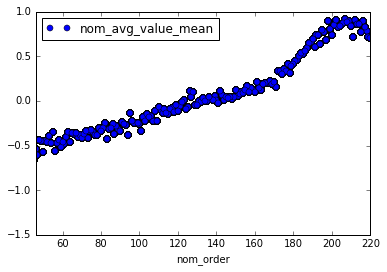

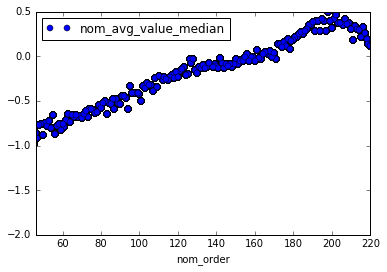

In [125]:
df.plot(x='nom_order', y='nom_avg_value_mean', style='o')
df.plot(x='nom_order', y='nom_avg_value_median', style='o')

In [52]:
# pipe = [{'$group':{'_id':'$player_id','total':{'$sum':1},'avg_pick':{'$avg':'$pick_num'}}},
#         { '$sort' : { 'total':-1} },
#         { '$match': { 'total': { '$gte': 40 } } },
#         { '$out' : "snake_standard_10team_avg_picks" }
#         ]

# standard_snake_10team_roto_picks.aggregate(pipeline=pipe)

# snake_standard_10team_avg_picks = db['snake_standard_10team_avg_picks']
# snake_standard_10team_avg_picks.count()

416

In [158]:
# snake_ranks_median = snake_picks.groupby('player_id').median().rank()
# snake_ranks_median
# snake_ranks_mean = snake_picks.groupby('player_id').mean().rank()
# snake_ranks_mean
# snake_counts = snake_picks.groupby('player_id').count()['pick_num']
# snake_counts = snake_counts[snake_counts>40]
# snake_summary = pd.concat([snake_counts, snake_ranks], axis=1, join='inner')
# snake_summary.columns = ['pick_count','median_pick_rank']
# snake_summary.sort('median_pick_rank')['median_pick_rank']

In [508]:
auctions_df = pd.DataFrame(list(standard_auction_10team_roto_picks.find()))
snakes_df = pd.DataFrame(list(standard_snake_10team_roto_picks.find()))

In [509]:
auction_counts = auctions.groupby('player_id').count()["_id"]
auction_counts = auction_counts[auction_counts>=1239]
player_ids = list(auction_counts.index)
auctions_df_filtered = auctions_df[auctions_df['player_id'].isin(player_ids)] 
snakes_df_filtered = snakes_df[snakes_df['player_id'].isin(player_ids)] 
len(player_ids)

242

In [510]:
median_auction_price = auctions_df_filtered.groupby('player_id').median()['price']
mean_auction_price = auctions_df_filtered.groupby('player_id').mean()['price']
median_snake_pick = snakes_df_filtered.groupby('player_id').median()['pick_num']
mean_snake_pick = snakes_df_filtered.groupby('player_id').mean()['pick_num']

In [511]:
auction_summary = pd.concat([median_auction_price,median_auction_price.rank(ascending=False),
                             mean_auction_price,mean_auction_price.rank(ascending=False)], 
                             axis=1, join='inner')

auction_summary.columns = ['median_auction_price','median_auction_price_rank',
                           'mean_auction_price','mean_auction_price_rank']

In [512]:
snake_summary = pd.concat([median_snake_pick,median_snake_pick.rank(ascending=True),
                           mean_snake_pick,mean_snake_pick.rank(ascending=True)], 
                             axis=1, join='inner')

snake_summary.columns = ['median_snake_pick','median_snake_pick_rank',
                           'mean_snake_pick','mean_snake_pick_rank']


In [547]:
draft_summary = pd.concat([auction_summary,snake_summary],axis=1)
draft_summary

,median_auction_price,median_auction_price_rank,mean_auction_price,mean_auction_price_rank,median_snake_pick,median_snake_pick_rank,mean_snake_pick,mean_snake_pick_rank
player_id,,,,,,,,
1019,5,150.0,5.539548,145,141,139.5,135.492821,134
1044,7,122.5,6.966895,121,122,117.5,121.888376,116
1060,2,190.5,2.482072,196,210,205.0,208.118460,205
1103,1,220.5,1.594387,216,218,215.0,211.875069,210
1113,8,113.5,7.780468,117,119,115.5,117.476089,112
1129,33,10.5,33.809120,10,9,8.5,9.399051,9
1130,21,28.5,21.525827,26,28,28.0,28.060807,28
1132,15,57.0,15.206215,56,53,53.0,52.707704,53
1137,2,190.5,2.560736,193,187,182.5,188.746848,185


In [514]:
medians = draft_summary[['median_auction_price_rank','median_snake_pick_rank']]\
            .sort_values(by=['median_auction_price_rank'])
    
medians['median_diff'] = medians['median_snake_pick_rank'] - medians['median_auction_price_rank']

In [515]:
means = draft_summary[['mean_auction_price_rank','mean_snake_pick_rank']]\
            .sort_values(by=['mean_auction_price_rank'])
    
means['mean_diff'] = means['mean_snake_pick_rank'] -  means['mean_auction_price_rank']

In [516]:
draft_order_diffs = pd.concat([medians,means],axis=1)
len(draft_order_diffs)

242

In [517]:
names = auctions_df.groupby('player_id').first()['player_name_id']
len(names)

1022

In [543]:
results = pd.concat([draft_order_diffs,names],axis=1,join='inner')\
            [['player_name_id','median_diff','median_auction_price_rank','median_snake_pick_rank']]\
            .sort_values(by=['median_diff'])
        
#results[:25]

In [544]:
#results[-25:].sort_values(by=['median_diff'],ascending=False)

In [634]:
espn_player_ranks = pd.DataFrame.from_csv('espn_auction_values/players_prices_with_ids.csv')
espn_player_ranks['espn_rank'] = espn_player_ranks.index +1
espn_player_ranks = espn_player_ranks.set_index('player_id')

In [635]:
# snake_drafts.aggregate([{"$group": {"_id": {"name":"$player_name","player_id":"$player_id"}}},
#                         {"$out": "master_players_list"}])

In [636]:
all_players = list(db['master_players_list'].find())
all_players = [x['_id'] for x in all_players]
all_players = pd.DataFrame(all_players)
all_players['player_id'] = all_players['player_id'].astype(int)
all_players = all_players.set_index('player_id')
all_players = all_players.join(espn_player_ranks, lsuffix='all', rsuffix = 'espn').drop('nameespn', axis=1)
all_players

,nameall,pos,pos_rank,price_10,team,price_12,espn_rank
player_id,,,,,,,
5618,Brooks Hall,NaN,NaN,NaN,NaN,NaN,NaN
3283,Christopher White,NaN,NaN,NaN,NaN,NaN,NaN
4773,Mark Reed,NaN,NaN,NaN,NaN,NaN,NaN
5077,Dayton Buller,NaN,NaN,NaN,NaN,NaN,NaN
4568,Forrest Snow,NaN,NaN,NaN,NaN,NaN,NaN
3457,Rob Musgrave,NaN,NaN,NaN,NaN,NaN,NaN
3664,Nick Bierbrodt,NaN,NaN,NaN,NaN,NaN,NaN
6439,Will Lamb,NaN,NaN,NaN,NaN,NaN,NaN
2663,Jesse English,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
espn